# Análisis Exploratorio

    Fuente de información: NUSE
    Archivos: 
    NUSE 934 611(M) 2017-2018.dsv
    NUSE 934-611-611M ENERO2019.csv

In [ ]:
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import calendar
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)  
from wordcloud import WordCloud, STOPWORDS

In [ ]:
#Create folder to save figures
import os

if not os.path.exists("figuras_nuse"):
    os.mkdir("figuras_nuse")

In [ ]:
def print_Data(df):
    display(df.style.hide_index())

In [ ]:
data_location = '/Users/anamaria/Downloads/NUSE 934 611(M) 2017-2018.dsv'
data2018=pd.read_csv(data_location,delimiter="|")

In [ ]:
data_location = '/Users/anamaria/Downloads/NUSE 934-611-611M ENERO2019.csv'
data2019=pd.read_csv(data_location,delimiter=";")

## Join datasets

In [ ]:
frames = [data2018, data2019]
data = pd.concat(frames)

In [ ]:
data.head()

In [ ]:
print("Tamaño:",data.shape)
print("size: ",data.size)
print("Porcentaje Celdas Vacias:",data.isna().mean().mean())
print("Porcentaje Celdas con valor '-':",(data == "-").mean().mean())
print("Filas duplicadas",data.duplicated().sum())

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
print("Tamaño:",data.shape)
print("size: ",data.size)
print("Porcentaje Celdas Vacias:",data.isna().mean().mean())
print("Porcentaje Celdas con valor '-':",(data == "-").mean().mean())
print("Filas duplicadas",data.duplicated().sum())

In [ ]:
pd.DataFrame({"Tipo de dato":data.dtypes.values,
              "Celdas con valor '-'":(data == '-').sum().values,
             "Celdas vacías": data.isna().sum().values},
             index=data.columns)

# Basic profiling

### Analisis campo 'FECHA' - univariado

In [ ]:
data['FECHA'] =  pd.to_datetime(data['FECHA'])
data2018['FECHA'] =  pd.to_datetime(data2018['FECHA'])
subdata=pd.DataFrame(data.groupby(["FECHA"]).size(),columns=["Frecuencia"]).sort_index().reset_index()
topdata=(subdata.sort_values(by=['Frecuencia'],ascending=False)[:10])

In [ ]:
print_Data(subdata)
sns.boxplot(y=subdata.Frecuencia)
pd.DataFrame(np.around([subdata.Frecuencia.mean(),subdata.Frecuencia.std(),subdata.Frecuencia.max(),subdata.Frecuencia. min()],2),
             index=['Media',"Desviación Estandar","Máximo","Mínimo"],columns=[""])

In [ ]:
#Statistical description
pd.DataFrame(subdata.describe())

In [ ]:
# Bar figure for top frequent values
fig = px.bar(topdata, x='Frecuencia', y='FECHA', orientation='h', color = 'FECHA', 
             color_discrete_sequence = px.colors.qualitative.Prism[2:])
fig.update_layout(title_text="Top dates of incident reports",yaxis={"type":"category"}, showlegend=False)
#fig.write_image("figuras_nuse/fecha_bar.png")
fig.show()

### Analisis campo 'FECHA'  vs tipo incidente

In [ ]:
data['TIPO_DETALLE'].unique()

#### Time series total

In [ ]:
subdata=pd.DataFrame(data.groupby(["FECHA",'TIPO_DETALLE']).size(),columns=["Frecuencia"]).sort_index().reset_index()
topdata=(subdata.sort_values(by=['Frecuencia'],ascending=False)[:10])

In [ ]:
fig = px.line(subdata, x='FECHA', y='Frecuencia', color='TIPO_DETALLE',
              color_discrete_sequence = px.colors.qualitative.Prism[0:], labels={"TIPO_DETALLE":"tipo"})
fig.update_layout(title_text="Serie de tiempo incidentes", legend_orientation='h',
                  xaxis_rangeslider_visible=True)
fig.update_xaxes(title="")
#fig.write_image("figuras_nuse/fecha_incidentes_ts.png")
fig.show()

#### Time series riñas

In [ ]:
A=subdata[subdata.TIPO_DETALLE == '934 - RIÑA']
fig = px.line(A, x='FECHA', y='Frecuencia', color='TIPO_DETALLE',
              color_discrete_sequence = px.colors.qualitative.Prism[1:], labels={"TIPO_DETALLE":"tipo"})
fig.update_xaxes(title="")
fig.update_layout(
    annotations=[
        go.layout.Annotation(
              x=i[0],
              y=i[1],
              xref="x",
              yref="y",
              showarrow=False,
              text=str(i[0].date())+" : "+str(i[1]),
              font=dict(
                  family="Courier New, monospace",
                  size=16,
                  color="black"
              ),
          ) for i in A.sort_values('Frecuencia').head(1).append(A.sort_values('Frecuencia').tail(4))[['FECHA','Frecuencia']].values
    ]
   
        
)

#fig.write_image("figuras_nuse/fecha_riña_ts.png",width=1000,height=500)
fig.show()
print("Promedio por dia: ",A.mean())
print("Desviación estandar por dia: ",A.std())

In [ ]:
#Maltrato mujer
fig = px.line(subdata.query('TIPO_DETALLE == "611M - MALTRATO A MUJER"'), x='FECHA', y='Cantidad',
              color_discrete_sequence = px.colors.qualitative.Prism[2:])
fig.update_layout(title_text="Serie de tiempo incidente maltrato a mujer",
                  xaxis_rangeslider_visible=False)
fig.write_image("figuras_nuse/fecha_maltrato_mujer_ts.png")
fig.show()

In [ ]:
#Maltrato
fig = px.line(subdata.query('TIPO_DETALLE == "611 - MALTRATO"'), x='FECHA', y='Cantidad',
              color_discrete_sequence = px.colors.qualitative.Prism[3:])
fig.update_layout(title_text="Serie de tiempo incidente riña",
                  xaxis_rangeslider_visible=False)
fig.write_image("figuras_nuse/fecha_maltrato_ts.png")
fig.show()

#### Bar frequency

In [ ]:
#Bar figure for top frequent values riñas
topdata = (subdata.query('TIPO_DETALLE == "934 - RIÑA"').sort_values(by=['Cantidad'],ascending=False))[:10]
fig = px.bar(topdata, x='Cantidad',y='FECHA', color='FECHA', orientation='h', 
             color_discrete_sequence = px.colors.qualitative.Prism[2:])
fig.update_layout(title_text="Top dates of incident reports",yaxis={"type":"category"}, showlegend=False)
fig.write_image("figuras_nuse/fecha_riña_bar.png")
fig.show()

In [ ]:
#Bar figure for top frequent values riñas
topdata = (subdata.query('TIPO_DETALLE == "611M - MALTRATO A MUJER"').sort_values(by=['Cantidad'],ascending=False))[:10]
fig = px.bar(topdata, x='Cantidad', y='FECHA', color='FECHA', orientation='h', color_discrete_sequence = px.colors.qualitative.Prism[2:])
fig.update_layout(title_text="Top dates of incident reports",yaxis={"type":"category"}, showlegend=False)
fig.write_image("figuras_nuse/fecha_maltrato_mujer_bar.png")
fig.show()

### Analisis variable aux 'day_of_week' - univariado

In [ ]:
data['day_of_week'] = data["FECHA"].dt.day_name()
data2018['day_of_week'] = data2018["FECHA"].dt.day_name()
weeks_between = round((data["FECHA"].max()-data["FECHA"].min())/np.timedelta64(1,'W'))

In [ ]:
#Statistical description
pd.DataFrame(subdata.describe())

In [ ]:
subdata=pd.DataFrame(data.groupby(["day_of_week","TIPO_DETALLE"]).size(),columns=["Frecuencia"]).sort_index().reset_index()

In [ ]:
#Probability riñas reports by week day
subdata_riña = pd.DataFrame(subdata.query('TIPO_DETALLE == "934 - RIÑA"'))

A=subdata_riña
A['Porcentaje']=A['Frecuencia']/A['Frecuencia'].sum()*100
fig=px.bar(A,x='Porcentaje',color='day_of_week',y='day_of_week',orientation='h',
           category_orders={"day_of_week": ["Monday", "Tuesday", "Wednesday", "Thursday","Friday","Saturday","Sunday"]},
           color_discrete_sequence = px.colors.qualitative.Prism[1:])
fig.update(layout_showlegend=False)
fig.update_layout(yaxis_title='Día de la semana')

fig.add_trace(go.Scatter(
    x=[A.Porcentaje.mean()]*2,
    y=['Monday','Sunday'],
    text=['',
          'Media='+str(round(A.Frecuencia.mean()/weeks_between,2)),
          ],
    line=dict(color='black', width=2),
    mode="text+lines",
))
fig.add_trace(go.Scatter(
    x=[A.Porcentaje.mean()+A.Porcentaje.std()]*2,
    y=['Monday','Sunday'],
    text=['',
          'std='+str(round(A.Frecuencia.std()/weeks_between,2)),
          ],
    line=dict(color='black', width=2,
                              dash='dash'),
    mode="text+lines",
))
fig.add_trace(go.Scatter(
    x=[A.Porcentaje.mean()-A.Porcentaje.std()]*2,
    y=['Monday','Sunday'],
    text=['',
          'std='+str(round(A.Frecuencia.std()/weeks_between,2)),
          ],
    line=dict(color='black', width=2,
                              dash='dash'),
    mode="text+lines",
))
#fig.write_image("figuras_nuse/nuse_dia_prob_riña.png",width=1000,height=500)
fig.show()



In [ ]:
#Probability maltrato mujer reports by week day
subdata_maltrato_mujer = pd.DataFrame(subdata.query('TIPO_DETALLE == "611M - MALTRATO A MUJER"'))

A=subdata_maltrato_mujer
A['Porcentaje']=A['Frecuencia']/A['Frecuencia'].sum()*100
fig=px.bar(A,x='Porcentaje',color='day_of_week',y='day_of_week',orientation='h',
           category_orders={"day_of_week": ["Monday", "Tuesday", "Wednesday", "Thursday","Friday","Saturday","Sunday"]},
           color_discrete_sequence = px.colors.qualitative.Prism[1:])
fig.update(layout_showlegend=False)
fig.update_layout(yaxis_title='Día de la semana')

fig.add_trace(go.Scatter(
    x=[A.Porcentaje.mean()]*2,
    y=['Monday','Sunday'],
    text=['',
          'Media='+str(round(A.Frecuencia.mean()/weeks_between,2)),
          ],
    line=dict(color='black', width=2),
    mode="text+lines",
))
fig.add_trace(go.Scatter(
    x=[A.Porcentaje.mean()+A.Porcentaje.std()]*2,
    y=['Monday','Sunday'],
    text=['',
          'std='+str(round(A.Frecuencia.std()/weeks_between,2)),
          ],
    line=dict(color='black', width=2,
                              dash='dash'),
    mode="text+lines",
))
fig.add_trace(go.Scatter(
    x=[A.Porcentaje.mean()-A.Porcentaje.std()]*2,
    y=['Monday','Sunday'],
    text=['',
          'std='+str(round(A.Frecuencia.std()/weeks_between,2)),
          ],
    line=dict(color='black', width=2,
                              dash='dash'),
    mode="text+lines",
))
#fig.write_image("figuras_nuse/nuse_dia_prob_maltrato_mujer.png",width=1000,height=500)
fig.show()

In [ ]:
#Probability maltrato reports by week day
subdata_maltrato = pd.DataFrame(subdata.query('TIPO_DETALLE == "611 - MALTRATO"'))

A=subdata_maltrato
A['Porcentaje']=A['Frecuencia']/A['Frecuencia'].sum()*100
fig=px.bar(A,x='Porcentaje',color='day_of_week',y='day_of_week',orientation='h',
           category_orders={"day_of_week": ["Monday", "Tuesday", "Wednesday", "Thursday","Friday","Saturday","Sunday"]},
           color_discrete_sequence = px.colors.qualitative.Prism[1:])
fig.update(layout_showlegend=False)
fig.update_layout(yaxis_title='Día de la semana')

fig.add_trace(go.Scatter(
    x=[A.Porcentaje.mean()]*2,
    y=['Monday','Sunday'],
    text=['Media='+str(round(A.Frecuencia.mean()/weeks_between,2)),
          '',
          ],
    line=dict(color='black', width=2),
    mode="text+lines",
))
fig.add_trace(go.Scatter(
    x=[A.Porcentaje.mean()+A.Porcentaje.std()]*2,
    y=['Monday','Sunday'],
    text=['',
          'std',
          ],
    line=dict(color='black', width=2,
                              dash='dash'),
    mode="text+lines",
))
fig.add_trace(go.Scatter(
    x=[A.Porcentaje.mean()-A.Porcentaje.std()]*2,
    y=['Monday','Sunday'],
    text=['',
          'std='+str(round(A.Frecuencia.std()/weeks_between,2)),
          ],
    line=dict(color='black', width=2,
                              dash='dash'),
    mode="text+lines",
))
#fig.write_image("figuras_nuse/nuse_dia_prob_maltrato.png",width=1000,height=500)
fig.show()

### Analisis variable aux 'day_of_week' vs tipo incidente- bivariado

In [ ]:
subdata=pd.DataFrame(data.groupby(["day_of_week","TIPO_DETALLE"]).size(),columns=["Cantidad"]).sort_index().reset_index()

In [ ]:
#Scatter plot all incidents
fig = px.scatter(subdata, x='day_of_week', y='Cantidad', color='TIPO_DETALLE',size="Cantidad",size_max=50,
              category_orders={"day_of_week": ["Monday", "Tuesday", "Wednesday", "Thursday","Friday","Saturday","Sunday"]},
              color_discrete_sequence = px.colors.qualitative.Prism[3:], labels={"TIPO_DETALLE":"tipo"})
fig.update_layout(title_text="Incidentes por día de la semana", legend_orientation='h',
                  xaxis_rangeslider_visible=False)
fig.update_xaxes(title="")
fig.write_image("figuras_nuse/dia_incidentes_scatter.png")
fig.show()

In [ ]:
#Incident reports by week day - maltrato a mujer
subdata=pd.DataFrame(data.groupby(["day_of_week","ANIO","TIPO_DETALLE"]).size(),columns=["Cantidad"]).sort_index().reset_index()
fig = px.bar(subdata.query('TIPO_DETALLE == TIPO_DETALLE == "934 - RIÑA"'), x='ANIO', y='Cantidad', color = 'day_of_week', barmode = 'group',
            category_orders={"day_of_week": ["Monday", "Tuesday", "Wednesday", "Thursday","Friday","Saturday","Sunday"]},
            color_discrete_sequence = px.colors.qualitative.Prism[2:])
fig.update_layout(title_text="Incident reports by day of week")
fig.write_image("figuras_nuse/day_week_year_riña_bar.png")
fig.show()

In [ ]:
#Incident reports by week day - maltrato a mujer
subdata=pd.DataFrame(data.groupby(["day_of_week","ANIO","TIPO_DETALLE"]).size(),columns=["Cantidad"]).sort_index().reset_index()
fig = px.bar(subdata.query('TIPO_DETALLE == "611M - MALTRATO A MUJER"'), x='ANIO', y='Cantidad', color = 'day_of_week', barmode = 'group',
            category_orders={"day_of_week": ["Monday", "Tuesday", "Wednesday", "Thursday","Friday","Saturday","Sunday"]},
            color_discrete_sequence = px.colors.qualitative.Prism[2:])
fig.update_layout(title_text="Incident reports by day of week")
fig.write_image("figuras_nuse/day_week_year_maltrato_mujer_bar.png")
fig.show()

### Día extendido

In [ ]:
#Crear columna DIA_EXTENDIDO
data['DIA_EXTENDIDO'] = data['day_of_week']
data.loc[(data.HORA >= 0) & (data.HORA <= 359) & (data.day_of_week == 'Monday'), 'DIA_EXTENDIDO'] = 'Sunday'
data.loc[(data.HORA >= 0) & (data.HORA <= 359) & (data.day_of_week == 'Tuesday'), 'DIA_EXTENDIDO'] = 'Monday'
data.loc[(data.HORA >= 0) & (data.HORA <= 359) & (data.day_of_week == 'Wednesday'), 'DIA_EXTENDIDO'] = 'Tuesday'
data.loc[(data.HORA >= 0) & (data.HORA <= 359) & (data.day_of_week == 'Thursday'), 'DIA_EXTENDIDO'] = 'Wednesday'
data.loc[(data.HORA >= 0) & (data.HORA <= 359) & (data.day_of_week == 'Friday'), 'DIA_EXTENDIDO'] = 'Thursday'
data.loc[(data.HORA >= 0) & (data.HORA <= 359) & (data.day_of_week == 'Saturday'), 'DIA_EXTENDIDO'] = 'Friday'
data.loc[(data.HORA >= 0) & (data.HORA <= 359) & (data.day_of_week == 'Sunday'), 'DIA_EXTENDIDO'] = 'Saturday'

In [ ]:
#Crear columna DIA_EXTENDIDO
data2018['DIA_EXTENDIDO'] = data2018['day_of_week']
data2018.loc[(data2018.HORA >= 0) & (data2018.HORA <= 359) & (data2018.day_of_week == 'Monday'), 'DIA_EXTENDIDO'] = 'Sunday'
data2018.loc[(data2018.HORA >= 0) & (data2018.HORA <= 359) & (data2018.day_of_week == 'Tuesday'), 'DIA_EXTENDIDO'] = 'Monday'
data2018.loc[(data2018.HORA >= 0) & (data2018.HORA <= 359) & (data2018.day_of_week == 'Wednesday'), 'DIA_EXTENDIDO'] = 'Tuesday'
data2018.loc[(data2018.HORA >= 0) & (data2018.HORA <= 359) & (data2018.day_of_week == 'Thursday'), 'DIA_EXTENDIDO'] = 'Wednesday'
data2018.loc[(data2018.HORA >= 0) & (data2018.HORA <= 359) & (data2018.day_of_week == 'Friday'), 'DIA_EXTENDIDO'] = 'Thursday'
data2018.loc[(data2018.HORA >= 0) & (data2018.HORA <= 359) & (data2018.day_of_week == 'Saturday'), 'DIA_EXTENDIDO'] = 'Friday'
data2018.loc[(data2018.HORA >= 0) & (data2018.HORA <= 359) & (data2018.day_of_week == 'Sunday'), 'DIA_EXTENDIDO'] = 'Saturday'

In [ ]:
subdata=pd.DataFrame(data.groupby(["DIA_EXTENDIDO","TIPO_DETALLE"]).size(),columns=["Frecuencia"]).sort_index().reset_index()

In [ ]:
#Probability riñas reports by week day
subdata_riña = pd.DataFrame(subdata.query('TIPO_DETALLE == "934 - RIÑA"'))

A=subdata_riña
A['Porcentaje']=A['Frecuencia']/A['Frecuencia'].sum()*100
fig=px.bar(A,x='Porcentaje',color='DIA_EXTENDIDO',y='DIA_EXTENDIDO',orientation='h',
           category_orders={"DIA_EXTENDIDO": ["Monday", "Tuesday", "Wednesday", "Thursday","Friday","Saturday","Sunday"]},
           color_discrete_sequence = px.colors.qualitative.Prism[1:])
fig.update(layout_showlegend=False)
fig.update_layout(yaxis_title='Día de la semana (extendido)')

fig.add_trace(go.Scatter(
    x=[A.Porcentaje.mean()]*2,
    y=['Monday','Sunday'],
    text=['',
          'Media='+str(round(A.Frecuencia.mean()/weeks_between,2)),
          ],
    line=dict(color='black', width=2),
    mode="text+lines",
))
fig.add_trace(go.Scatter(
    x=[A.Porcentaje.mean()+A.Porcentaje.std()]*2,
    y=['Monday','Sunday'],
    text=['',
          'std='+str(round(A.Frecuencia.std()/weeks_between,2)),
          ],
    line=dict(color='black', width=2,
                              dash='dash'),
    mode="text+lines",
))
fig.add_trace(go.Scatter(
    x=[A.Porcentaje.mean()-A.Porcentaje.std()]*2,
    y=['Monday','Sunday'],
    text=['',
          'std='+str(round(A.Frecuencia.std()/weeks_between,2)),
          ],
    line=dict(color='black', width=2,
                              dash='dash'),
    mode="text+lines",
))
fig.write_image("figuras_nuse/nuse_dia_extendido_prob_riña.png",width=1000,height=500)
fig.show()


### Análisis campo 'HORA'

In [ ]:
subdata=pd.DataFrame(data.groupby(["HORA"]).size(),columns=["Frecuencia"]).sort_index().reset_index()
topdata=(subdata.sort_values(by=['Frecuencia'],ascending=False)[:10])

In [ ]:
print_Data(subdata)
sns.boxplot(y=subdata.Frecuencia)
pd.DataFrame(np.around([subdata.Frecuencia.mean(),subdata.Frecuencia.std(),subdata.Frecuencia.max(),subdata.Frecuencia. min()],2),
             index=['Media',"Desviación Estandar","Máximo","Mínimo"],columns=[""])

In [ ]:
#Statistical description
pd.DataFrame(subdata.describe())

### Rango hora

In [ ]:
#Crear columna RANGO_HORA con intervalos cada 4 horas
data.loc[(data.HORA >= 0) & (data.HORA <= 359), 'RANGO_HORA'] = '0:00 a 3:59'
data.loc[(data.HORA >= 400) & (data.HORA <= 759), 'RANGO_HORA'] = '4:00 a 7:59'
data.loc[(data.HORA >= 800) & (data.HORA <= 1159), 'RANGO_HORA'] = '8:00 a 11:59'
data.loc[(data.HORA >= 1200) & (data.HORA <= 1559), 'RANGO_HORA'] = '12:00 a 15:59'
data.loc[(data.HORA >= 1600) & (data.HORA <= 1959), 'RANGO_HORA'] = '16:00 a 19:59'
data.loc[(data.HORA >= 2000) & (data.HORA <= 2359), 'RANGO_HORA'] = '20:00 a 23:59'

### Análisis campo 'HORA' - tipo incidente: bivariado
#### Time series

In [ ]:
#Format 'HORA' field into datetime to proper visualization
data['time_stamp']=pd.to_datetime(data["HORA"].astype(str).str.rjust(4,'0'),format= '%H%M').dt.time

In [ ]:
##Time series
subdata=pd.DataFrame(data.groupby(["time_stamp"]).size(),columns=["Cantidad"]).sort_index().reset_index()
fig = px.line(subdata, x='time_stamp', y='Cantidad',
              color_discrete_sequence = px.colors.qualitative.Prism[1:])
fig.update_layout(title_text="Incident reports time series - time (24 hr format)",
                  xaxis_rangeslider_visible=True)
fig.write_image("figuras_nuse/hora_ts.png")
fig.show()

In [ ]:
subdata=pd.DataFrame(data.groupby(["time_stamp","TIPO_DETALLE"]).size(),columns=["Frecuencia"]).sort_index().reset_index()

In [ ]:
#Riña
A=subdata[subdata.TIPO_DETALLE == '934 - RIÑA']
fig = px.line(A, x='time_stamp', y='Frecuencia', color='TIPO_DETALLE',
              color_discrete_sequence = px.colors.qualitative.Prism[1:], labels={"TIPO_DETALLE":"tipo"})
fig.update_xaxes(title="")
fig.update_layout(
    annotations=[
        go.layout.Annotation(
              x=i[0],
              y=i[1],
              xref="x",
              yref="y",
              showarrow=False,
              text=str(i[0])+" : "+str(i[1]),
              font=dict(
                  family="Courier New, monospace",
                  size=16,
                  color="black"
              ),
          ) for i in A.sort_values('Frecuencia').head(1).append(A.sort_values('Frecuencia').tail(1))[['time_stamp','Frecuencia']].values
    ]
   
        
)

#fig.write_image("figuras_nuse/nuse_hora_probab_riña_ts.png",width=1000,height=500)
fig.show()
print("Promedio por hora: ",A.mean())
print("Desviación estandar por hora: ",A.std())

In [ ]:
#Maltrato mujer
A=subdata[subdata.TIPO_DETALLE == '611M - MALTRATO A MUJER']
fig = px.line(A, x='time_stamp', y='Frecuencia', color='TIPO_DETALLE',
              color_discrete_sequence = px.colors.qualitative.Prism[0:], labels={"TIPO_DETALLE":"tipo"})
fig.update_xaxes(title="")
fig.update_layout(
    annotations=[
        go.layout.Annotation(
              x=i[0],
              y=i[1],
              xref="x",
              yref="y",
              showarrow=False,
              text=str(i[0])+" : "+str(i[1]),
              font=dict(
                  family="Courier New, monospace",
                  size=16,
                  color="black"
              ),
          ) for i in A.sort_values('Frecuencia').head(1).append(A.sort_values('Frecuencia').tail(1))[['time_stamp','Frecuencia']].values
    ]
   
        
)

fig.write_image("figuras_nuse/nuse_hora_maltrato_mujer_ts.png",width=1000,height=500)
fig.show()
print("Promedio por hora: ",A.mean())
print("Desviación estandar por hora: ",A.std())

In [ ]:
#Maltrato
A=subdata[subdata.TIPO_DETALLE == '611 - MALTRATO']
fig = px.line(A, x='time_stamp', y='Frecuencia', color='TIPO_DETALLE',
              color_discrete_sequence = px.colors.qualitative.Prism[2:], labels={"TIPO_DETALLE":"tipo"})
fig.update_xaxes(title="")
fig.update_layout(
    annotations=[
        go.layout.Annotation(
              x=i[0],
              y=i[1],
              xref="x",
              yref="y",
              showarrow=False,
              text=str(i[0])+" : "+str(i[1]),
              font=dict(
                  family="Courier New, monospace",
                  size=16,
                  color="black"
              ),
          ) for i in A.sort_values('Frecuencia').head(1).append(A.sort_values('Frecuencia').tail(1))[['time_stamp','Frecuencia']].values
    ]
   
        
)

fig.write_image("figuras_nuse/nuse_hora_maltrato_ts.png",width=1000,height=500)
fig.show()
print("Promedio por hora: ",A.mean())
print("Desviación estandar por hora: ",A.std())

### Análisis campo 'HORA' y día - tipo incidente: bivariado
#### Time series

In [ ]:
#Incident reports by week day and hour (total reportes)

subdata=pd.DataFrame(data.groupby(["time_stamp","day_of_week"]).size(),columns=["Cantidad"]).sort_index().reset_index()

fig = px.line(subdata, x="time_stamp", y="Cantidad", facet_row="day_of_week", color="day_of_week",
              width=800, height=1400,  color_discrete_sequence = px.colors.qualitative.Prism[1:],
              category_orders={"day_of_week": ["Monday", "Tuesday", "Wednesday", "Thursday","Friday","Saturday","Sunday"]},
              labels={"day_of_week":"day"})
fig.update_layout(title_text="",
                 showlegend=False)
#fig.write_image("figuras_nuse/nuse_dia_hora_ts.png")
fig.show()

In [ ]:
#Incident reports by week day and hour riña
subdata=pd.DataFrame(data.groupby(["time_stamp","day_of_week","TIPO_DETALLE"]).size(),columns=["Cantidad"]).sort_index().reset_index()

fig = px.line(subdata.query('TIPO_DETALLE == "934 - RIÑA"'), x="time_stamp", y="Cantidad", facet_row="day_of_week", color="day_of_week",
              width=800, height=1400,  color_discrete_sequence = px.colors.qualitative.Prism[1:],
              category_orders={"day_of_week": ["Monday", "Tuesday", "Wednesday", "Thursday","Friday","Saturday","Sunday"]},
              labels={"day_of_week":"day"})
fig.update_layout(title_text="Reporte riñas por día y hora",
                 showlegend=False)
fig.write_image("figuras_nuse/day_week_hour_riña_ts.png")
fig.show()

In [ ]:
#Incident reports by week day and hour maltrato mujer
subdata=pd.DataFrame(data.groupby(["time_stamp","day_of_week","TIPO_DETALLE"]).size(),columns=["Cantidad"]).sort_index().reset_index()

fig = px.line(subdata.query('TIPO_DETALLE == "611M - MALTRATO A MUJER"'), x="time_stamp", y="Cantidad", facet_row="day_of_week", color="day_of_week",
              width=800, height=1400,  color_discrete_sequence = px.colors.qualitative.Prism[1:],
              category_orders={"day_of_week": ["Monday", "Tuesday", "Wednesday", "Thursday","Friday","Saturday","Sunday"]},
              labels={"day_of_week":"day"})
fig.update_layout(title_text="Reporte 'maltrato mujer' por día y hora",legend_orientation='h',
                 showlegend=True)
#fig.write_image("figuras_nuse/day_week_hour_mmujer_ts.png")
fig.show()

### Análisis campo 'ANIO'

In [ ]:
subdata=pd.DataFrame(data.groupby(["ANIO"]).size(),columns=["Frecuencia"]).sort_index().reset_index()
topdata=(subdata.sort_values(by=['Frecuencia'],ascending=False)[:10])

In [ ]:
print_Data(subdata)
sns.boxplot(y=subdata.Frecuencia)
pd.DataFrame(np.around([subdata.Frecuencia.mean(),subdata.Frecuencia.std(),subdata.Frecuencia.max(),subdata.Frecuencia. min()],2),
             index=['Media',"Desviación Estandar","Máximo","Mínimo"],columns=[""])

In [ ]:
#Statistical description
pd.DataFrame(subdata.describe())

In [ ]:
#Format to string
data['ANIO']=data["ANIO"].astype(str)

In [ ]:
# Bar figure
fig = px.bar(subdata, x='Cantidad', y='ANIO', color='ANIO', orientation='h', 
             color_discrete_sequence = px.colors.qualitative.Prism[1:])
fig.update_layout(title_text="Incident reports by year",
                 yaxis={"type":"category"}, showlegend=False)
fig.write_image("figuras_nuse/año_bar.png")
fig.show()

### Análisis año - tipo incidente: bivariado

In [ ]:
data2018['ANIO']=data2018["ANIO"].astype(str)
subdata=pd.DataFrame(data2018.groupby(["ANIO","TIPO_DETALLE"]).size(),columns=["Cantidad"]).sort_index().reset_index()

In [ ]:
#Bar plot
fig = px.bar(subdata, x='ANIO', y='Cantidad', color='TIPO_DETALLE',
              color_discrete_sequence = px.colors.qualitative.Prism[0:], labels={"TIPO_DETALLE":"tipo"})
fig.update_layout(title_text="Incidentes por año", legend_orientation='h',xaxis={"type":"category"},
                  xaxis_rangeslider_visible=False)
fig.update_xaxes(title="")
fig.write_image("figuras_nuse/año_incidentes_bar.png")
fig.show()

### Análisis campo 'MES'

In [ ]:
subdata=pd.DataFrame(data2018.groupby(["MES"]).size(),columns=["Frecuencia"]).sort_index().reset_index()
topdata=(subdata.sort_values(by=['Frecuencia'],ascending=False)[:10])

In [ ]:
print_Data(subdata)
sns.boxplot(y=subdata.Frecuencia)
pd.DataFrame(np.around([subdata.Frecuencia.mean(),subdata.Frecuencia.std(),subdata.Frecuencia.max(),subdata.Frecuencia. min()],2),
             index=['Media',"Desviación Estandar","Máximo","Mínimo"],columns=[""])

In [ ]:
#Statistical description
pd.DataFrame(subdata.describe())

In [ ]:
data2018['MES']=data2018["MES"].astype(str)

In [ ]:
# Bar figure
fig = px.bar(subdata, x='Cantidad', y='MES', orientation='h', color='MES',
             color_discrete_sequence = px.colors.qualitative.Prism[0:],
             category_orders={"MES": ["1","2","3","4","5","6","7","8","9","10","11","12"]})
fig.update_layout(title_text="Incident reports by month",
                 yaxis={"type":"category"}, showlegend=False)
#fig.write_image("figuras_nuse/mes_bar_2017-2018.png")
fig.show()

In [ ]:
#Probabilidad ocurrencia de reporte cada tipo de incidente por mes
subdata=pd.DataFrame(data2018.groupby(["MES","TIPO_DETALLE"]).size(),columns=["Frecuencia"]).sort_index().reset_index()
months_repeated = 2

In [ ]:
#Probability riña reports by month
subdata_riña = pd.DataFrame(subdata.query('TIPO_DETALLE == "934 - RIÑA"'))

A=subdata_riña
A['Porcentaje']=A['Frecuencia']/A['Frecuencia'].sum()*100
fig=px.bar(A,x='Porcentaje',color='MES',y='MES',orientation='h',
           category_orders={"MES": ["1","2","3","4","5","6","7","8","9","10","11","12"]},
           color_discrete_sequence = px.colors.qualitative.Prism[1:])
fig.update(layout_showlegend=False)
fig.update_layout(yaxis_title='Mes')

fig.add_trace(go.Scatter(
    x=[A.Porcentaje.mean()]*2,
    y=['12','1'],
    text=['Media='+str(round(A.Frecuencia.mean()/months_repeated,2)),
          '',
          ],
    line=dict(color='black', width=2),
    mode="text+lines",
))
fig.add_trace(go.Scatter(
    x=[A.Porcentaje.mean()+A.Porcentaje.std()]*2,
    y=['12','1'],
    text=['',
          'std='+str(round(A.Frecuencia.std()/months_repeated,2)),
          ],
    line=dict(color='black', width=2,
                              dash='dash'),
    mode="text+lines",
))
fig.add_trace(go.Scatter(
    x=[A.Porcentaje.mean()-A.Porcentaje.std()]*2,
    y=['12','1'],
    text=['',
          'std='+str(round(A.Frecuencia.std()/months_repeated,2)),
          ],
    line=dict(color='black', width=2,
                              dash='dash'),
    mode="text+lines",
))
fig.write_image("figuras_nuse/nuse_mes_prob_riñar.png",width=1000,height=500)
fig.show()

In [ ]:
#Probability maltrato a mujer reports by month
subdata_maltrato_mujer = pd.DataFrame(subdata.query('TIPO_DETALLE == "611M - MALTRATO A MUJER"'))

A=subdata_maltrato_mujer
A['Porcentaje']=A['Frecuencia']/A['Frecuencia'].sum()*100
fig=px.bar(A,x='Porcentaje',color='MES',y='MES',orientation='h',
           category_orders={"MES": ["1","2","3","4","5","6","7","8","9","10","11","12"]},
           color_discrete_sequence = px.colors.qualitative.Prism[1:])
fig.update(layout_showlegend=False)
fig.update_layout(yaxis_title='Mes')

fig.add_trace(go.Scatter(
    x=[A.Porcentaje.mean()]*2,
    y=['12','1'],
    text=['Media='+str(round(A.Frecuencia.mean()/months_repeated,2)),
          '',
          ],
    line=dict(color='black', width=2),
    mode="text+lines",
))
fig.add_trace(go.Scatter(
    x=[A.Porcentaje.mean()+A.Porcentaje.std()]*2,
    y=['12','1'],
    text=['',
          'std='+str(round(A.Frecuencia.std()/months_repeated,2)),
          ],
    line=dict(color='black', width=2,
                              dash='dash'),
    mode="text+lines",
))
fig.add_trace(go.Scatter(
    x=[A.Porcentaje.mean()-A.Porcentaje.std()]*2,
    y=['12','1'],
    text=['',
          'std='+str(round(A.Frecuencia.std()/months_repeated,2)),
          ],
    line=dict(color='black', width=2,
                              dash='dash'),
    mode="text+lines",
))
fig.write_image("figuras_nuse/nuse_mes_prob_maltrato_mujer.png",width=1000,height=500)
fig.show()

In [ ]:
#Probability maltrato reports by month
subdata_maltrato = pd.DataFrame(subdata.query('TIPO_DETALLE == "611 - MALTRATO"'))

A=subdata_maltrato
A['Porcentaje']=A['Frecuencia']/A['Frecuencia'].sum()*100
fig=px.bar(A,x='Porcentaje',color='MES',y='MES',orientation='h',
           category_orders={"MES": ["1","2","3","4","5","6","7","8","9","10","11","12"]},
           color_discrete_sequence = px.colors.qualitative.Prism[1:])
fig.update(layout_showlegend=False)
fig.update_layout(yaxis_title='Mes')

fig.add_trace(go.Scatter(
    x=[A.Porcentaje.mean()]*2,
    y=['12','1'],
    text=['Media='+str(round(A.Frecuencia.mean()/months_repeated,2)),
          '',
          ],
    line=dict(color='black', width=2),
    mode="text+lines",
))
fig.add_trace(go.Scatter(
    x=[A.Porcentaje.mean()+A.Porcentaje.std()]*2,
    y=['12','1'],
    text=['',
          'std='+str(round(A.Frecuencia.std()/months_repeated,2)),
          ],
    line=dict(color='black', width=2,
                              dash='dash'),
    mode="text+lines",
))
fig.add_trace(go.Scatter(
    x=[A.Porcentaje.mean()-A.Porcentaje.std()]*2,
    y=['12','1'],
    text=['',
          'std='+str(round(A.Frecuencia.std()/months_repeated,2)),
          ],
    line=dict(color='black', width=2,
                              dash='dash'),
    mode="text+lines",
))
fig.write_image("figuras_nuse/nuse_mes_prob_maltrato.png",width=1000,height=500)
fig.show()

### Análisis año: bivariado

In [ ]:
#Graph incidents by month and day of week
subdata=pd.DataFrame(data2018.groupby(["MES","day_of_week"]).size(),columns=["Cantidad"]).sort_index().reset_index()

fig = px.bar(subdata, x="MES", y="Cantidad", color="day_of_week",
            category_orders={"day_of_week": ["Monday", "Tuesday", "Wednesday", "Thursday","Friday","Saturday","Sunday"]},
            labels={"day_of_week":"day"},color_discrete_sequence = px.colors.qualitative.Prism[1:])
fig.update_layout(title_text="Incident reports by day of week and month")
fig.write_image("figuras_nuse/day_week_month_bar_2017-2018.png")
fig.show()

In [ ]:
#Scatter plot
subdata=pd.DataFrame(data2018.groupby(["MES","TIPO_DETALLE"]).size(),columns=["Cantidad"]).sort_index().reset_index()
fig = px.scatter(subdata, x='MES', y='Cantidad', color='TIPO_DETALLE',size="Cantidad",size_max=30,
              color_discrete_sequence = px.colors.qualitative.Prism[3:], labels={"TIPO_DETALLE":"tipo"})
fig.update_layout(title_text="Incidentes por mes", legend_orientation='h',
                  xaxis_rangeslider_visible=False)
fig.update_xaxes(title="")
fig.write_image("figuras_nuse/mes_incidentes_scatter.png")
fig.show()

### Análisis campo 'PERIODO_TS'

In [ ]:
subdata=pd.DataFrame(data.groupby(["PERIODO_TS"]).size(),columns=["Frecuencia"]).sort_index().reset_index()
topdata=(subdata.sort_values(by=['Frecuencia'],ascending=False)[:10])

In [ ]:
print_Data(subdata)
sns.boxplot(y=subdata.Frecuencia)
pd.DataFrame(np.around([subdata.Frecuencia.mean(),subdata.Frecuencia.std(),subdata.Frecuencia.max(),subdata.Frecuencia. min()],2),
             index=['Media',"Desviación Estandar","Máximo","Mínimo"],columns=[""])

In [ ]:
#Statistical description
pd.DataFrame(subdata.describe())

In [ ]:
fig = px.bar(subdata, y="PERIODO_TS", x="Cantidad", orientation='h', color="PERIODO_TS",
            color_discrete_sequence = px.colors.qualitative.Prism[1:])
fig.update_layout(title_text="Incident reports by 'PERIODO_TS'",showlegend=False)
fig.write_image("figuras_nuse/periodo_bar.png")
fig.show()

### Análisis campo 'COD_LOCALIDAD' y 'LOCALIDAD'

In [ ]:
subdata=pd.DataFrame(data.groupby(["COD_LOCALIDAD","LOCALIDAD"]).size(),columns=["Cantidad"]).sort_index().reset_index()
topdata=(subdata.sort_values(by=['Cantidad'],ascending=False)[:20])

In [ ]:
#Statistical description
pd.DataFrame(subdata.describe())

In [ ]:
# Bar figure
fig = px.bar(topdata, x='Cantidad', y='LOCALIDAD', orientation='h', color='LOCALIDAD',
             color_discrete_sequence = px.colors.qualitative.Prism[0:])
fig.update_layout(title_text="Top incident reports by 'localidades'",
                 yaxis={"type":"category"}, showlegend=False)
fig.write_image("figuras_nuse/localidad_bar.png")
fig.show()

### Análisis probabilidad localidad por tipo de incidente

In [ ]:
subdata=pd.DataFrame(data.groupby(["LOCALIDAD","TIPO_DETALLE"]).size(),columns=["Frecuencia"]).sort_index().reset_index()

In [ ]:
subdata.LOCALIDAD.unique()

In [ ]:
#Probabilidad riñas por localidad
subdata_riñas = pd.DataFrame(subdata.query('TIPO_DETALLE == "934 - RIÑA"'))

A=subdata_riñas
A['Porcentaje']=A['Frecuencia']/A['Frecuencia'].sum()*100
fig=px.bar(A,x='Porcentaje',color='LOCALIDAD',y='LOCALIDAD',orientation='h',
           color_discrete_sequence = px.colors.qualitative.Prism[1:])
fig.update(layout_showlegend=False)
fig.update_layout(yaxis_title='Localidad')

fig.add_trace(go.Scatter(
    x=[A.Porcentaje.mean()]*2,
    y=['USME','ANTONIO NARIÑO'],
    text=['',
          'Media='+str(round(A.Frecuencia.mean(),2)),
          ],
    line=dict(color='black', width=2),
    mode="text+lines",
))
fig.add_trace(go.Scatter(
    x=[A.Porcentaje.mean()+A.Porcentaje.std()]*2,
    y=['USME','ANTONIO NARIÑO'],
    text=['',
          'std='+str(round(A.Frecuencia.std(),2)),
          ],
    line=dict(color='black', width=2,
                              dash='dash'),
    mode="text+lines",
))
fig.add_trace(go.Scatter(
    x=[A.Porcentaje.mean()-A.Porcentaje.std()]*2,
    y=['USME','ANTONIO NARIÑO'],
    text=['',
          'std='+str(round(A.Frecuencia.std(),2)),
          ],
    line=dict(color='black', width=2,
                              dash='dash'),
    mode="text+lines",
))
#fig.write_image("figuras_nuse/nuse_localidad_prob_riña.png",width=1000,height=500)
fig.show()


In [ ]:
#Probabilidad maltrato a mujer por localidad
subdata_maltrato_mujer = pd.DataFrame(subdata.query('TIPO_DETALLE == "611M - MALTRATO A MUJER"'))

A=subdata_maltrato_mujer
A['Porcentaje']=A['Frecuencia']/A['Frecuencia'].sum()*100
fig=px.bar(A,x='Porcentaje',color='LOCALIDAD',y='LOCALIDAD',orientation='h',
           color_discrete_sequence = px.colors.qualitative.Prism[1:])
fig.update(layout_showlegend=False)
fig.update_layout(yaxis_title='Localidad')

fig.add_trace(go.Scatter(
    x=[A.Porcentaje.mean()]*2,
    y=['USME','ANTONIO NARIÑO'],
    text=['',
          'Media='+str(round(A.Frecuencia.mean(),2)),
          ],
    line=dict(color='black', width=2),
    mode="text+lines",
))
fig.add_trace(go.Scatter(
    x=[A.Porcentaje.mean()+A.Porcentaje.std()]*2,
    y=['USME','ANTONIO NARIÑO'],
    text=['',
          'std='+str(round(A.Frecuencia.std(),2)),
          ],
    line=dict(color='black', width=2,
                              dash='dash'),
    mode="text+lines",
))
fig.add_trace(go.Scatter(
    x=[A.Porcentaje.mean()-A.Porcentaje.std()]*2,
    y=['USME','ANTONIO NARIÑO'],
    text=['',
          'std='+str(round(A.Frecuencia.std(),2)),
          ],
    line=dict(color='black', width=2,
                              dash='dash'),
    mode="text+lines",
))
#fig.write_image("figuras_nuse/nuse_localidad_prob_maltrato_mujer.png",width=1000,height=500)
fig.show()



In [ ]:
#Probabilidad maltrato por localidad
subdata_maltrato = pd.DataFrame(subdata.query('TIPO_DETALLE == "611 - MALTRATO"'))

A=subdata_maltrato
A['Porcentaje']=A['Frecuencia']/A['Frecuencia'].sum()*100
fig=px.bar(A,x='Porcentaje',color='LOCALIDAD',y='LOCALIDAD',orientation='h',
           color_discrete_sequence = px.colors.qualitative.Prism[1:])
fig.update(layout_showlegend=False)
fig.update_layout(yaxis_title='Localidad')

fig.add_trace(go.Scatter(
    x=[A.Porcentaje.mean()]*2,
    y=['USME','ANTONIO NARIÑO'],
    text=['',
          'Media='+str(round(A.Frecuencia.mean(),2)),
          ],
    line=dict(color='black', width=2),
    mode="text+lines",
))
fig.add_trace(go.Scatter(
    x=[A.Porcentaje.mean()+A.Porcentaje.std()]*2,
    y=['USME','ANTONIO NARIÑO'],
    text=['',
          'std='+str(round(A.Frecuencia.std(),2)),
          ],
    line=dict(color='black', width=2,
                              dash='dash'),
    mode="text+lines",
))
fig.add_trace(go.Scatter(
    x=[A.Porcentaje.mean()-A.Porcentaje.std()]*2,
    y=['USME','ANTONIO NARIÑO'],
    text=['',
          'std='+str(round(A.Frecuencia.std(),2)),
          ],
    line=dict(color='black', width=2,
                              dash='dash'),
    mode="text+lines",
))
#fig.write_image("figuras_nuse/nuse_localidad_prob_maltrato.png",width=1000,height=500)
fig.show()




### Análisis localidad: bivariado

In [ ]:
#Scatter plot
subdata=pd.DataFrame(data.groupby(["LOCALIDAD","TIPO_DETALLE"]).size(),columns=["Cantidad"]).sort_index().reset_index()
fig = px.scatter(subdata, x='LOCALIDAD', y='Cantidad', color='TIPO_DETALLE',size="Cantidad",size_max=30,
                 width=1000, height=600,
              color_discrete_sequence = px.colors.qualitative.Prism[3:], labels={"TIPO_DETALLE":"tipo"})
fig.update_layout(title_text="Incidentes por mes", legend_orientation='v', showlegend=False,
                  xaxis_rangeslider_visible=False)
fig.update_xaxes(title="",tickangle=90)
fig.write_image("figuras_nuse/localidad_incidentes_scatter.png")
fig.show()

### Análisis campo 'COD_UPZ' y 'UPZ'

In [ ]:
subdata=pd.DataFrame(data.groupby(["COD_UPZ","UPZ"]).size(),columns=["Cantidad"]).sort_index().reset_index()
topdata=(subdata.sort_values(by=['Cantidad'],ascending=False)[:10])

In [ ]:
#Statistical description
pd.DataFrame(subdata.describe())

In [ ]:
# Bar figure
fig = px.bar(topdata, x='Cantidad', y='UPZ', orientation='h', color='UPZ',
             color_discrete_sequence = px.colors.qualitative.Prism[0:])
fig.update_layout(title_text="Top incident reports by 'UPZ'",
                 yaxis={"type":"category"}, showlegend=False)
fig.write_image("figuras_nuse/upz_bar.png")
fig.show()

### Análisis campos 'COD_SEC_CATAST‘ y ‘SEC_CATASTRAL'

In [ ]:
subdata=pd.DataFrame(data.groupby(["COD_SEC_CATAST","SEC_CATASTRAL"]).size(),columns=["Cantidad"]).sort_index().reset_index()
topdata=(subdata.sort_values(by=['Cantidad'],ascending=False)[:10])

In [ ]:
#Statistical description
pd.DataFrame(subdata.describe())

In [ ]:
# Bar figure
fig = px.bar(topdata, x='Cantidad', y='SEC_CATASTRAL', orientation='h', color='SEC_CATASTRAL',
             color_discrete_sequence = px.colors.qualitative.Prism[0:])
fig.update_layout(title_text="Top incident reports by 'UPZ'",
                 yaxis={"type":"category"}, showlegend=False)
fig.write_image("figuras_nuse/sec_catastr_bar.png")
fig.show()

### Análisis campos 'COD_BARRIO' Y 'BARRIO'

In [ ]:
subdata=pd.DataFrame(data.groupby(["COD_BARRIO","BARRIO"]).size(),columns=["Cantidad"]).sort_index().reset_index()
topdata=(subdata.sort_values(by=['Cantidad'],ascending=False)[:10])

In [ ]:
#Statistical description
pd.DataFrame(subdata.describe())

In [ ]:
# Bar figure
fig = px.bar(topdata, x='Cantidad', y='BARRIO', orientation='h', color='BARRIO',
             color_discrete_sequence = px.colors.qualitative.Prism[0:])
fig.update_layout(title_text="Top incident reports by 'BARRIO'",
                 yaxis={"type":"category"}, showlegend=False)
fig.write_image("figuras_nuse/barrio_bar.png")
fig.show()

### Análisis campos (LATITUD, LONGITUD)

In [ ]:
subdata=pd.DataFrame(data.groupby(['LATITUD','LONGITUD']).size()).reset_index().rename(columns={0:"Frecuencia"})
topdata=(position.sort_values(by=['Frecuencia'],ascending=False)[:10])

In [ ]:
print_Data(subdata)
sns.boxplot(y=subdata.Frecuencia)
pd.DataFrame(np.around([subdata.Frecuencia.mean(),subdata.Frecuencia.std(),subdata.Frecuencia.max(),subdata.Frecuencia. min()],2),
             index=['Media',"Desviación Estandar","Máximo","Mínimo"],columns=[""])

In [ ]:
#Statistical description
pd.DataFrame(subdata.describe())

#### Mapa con reporte de incidencias (LATITUD, LONGITUD)

In [ ]:
px.set_mapbox_access_token("")

fig = px.scatter_mapbox(position, lat="LATITUD", lon="LONGITUD",zoom=10,size='Cantidad',color='Cantidad')
fig.write_image("figuras_nuse/mapa.png")
fig.show()

### Mapa de calor

In [ ]:
import folium
from folium import plugins
A=data[['LATITUD','LONGITUD']]
map_hooray = folium.Map(location=[4.626860,-74.084216],
                   zoom_start = 11)
hm = plugins.HeatMap(A.sample(50000).values.tolist(),radius=9)
hm.add_to(map_hooray)
map_hooray.save("figuras_nuse/nuse_map.png")
map_hooray

### Mapa por tipo de incidente: bivariado

In [ ]:
position=pd.DataFrame(data.groupby(['LATITUD','LONGITUD','TIPO_DETALLE']).size()).reset_index().rename(columns={0:"Cantidad"})
topdata=(position.sort_values(by=['Cantidad'],ascending=False)[:10])

In [ ]:
px.set_mapbox_access_token("")

fig = px.scatter_mapbox(position.query('TIPO_DETALLE == "934 - RIÑA"'), lat="LATITUD", lon="LONGITUD",zoom=10,size='Cantidad',color='Cantidad')
fig.write_image("figuras_nuse/mapa_riña.png")
fig.show()

In [ ]:
px.set_mapbox_access_token("")

fig = px.scatter_mapbox(position.query('TIPO_DETALLE == "611M - MALTRATO A MUJER"'), lat="LATITUD", lon="LONGITUD",zoom=10,size='Cantidad',color='Cantidad')
fig.write_image("figuras_nuse/mapa_mmujer.png")
fig.show()

### Análisis campo 'STR_DIRECCION_INCIDENTE'

In [ ]:
subdata=pd.DataFrame(data.groupby(["STR_DIRECCION_INCIDENTE"]).size(),columns=["Cantidad"]).sort_index().reset_index()
topdata=(subdata.sort_values(by=['Cantidad'],ascending=False)[:10])
print_Data(topdata)

In [ ]:
#Statistical description
pd.DataFrame(subdata.describe())

In [ ]:
# Bar figure
fig = px.bar(topdata, x='Cantidad', y='STR_DIRECCION_INCIDENTE', orientation='h', color='STR_DIRECCION_INCIDENTE',
             color_discrete_sequence = px.colors.qualitative.Prism[0:])
fig.update_layout(title_text="Top incident reports by 'STR_DIRECCION_INCIDENTE'",
                 yaxis={"type":"category"}, showlegend=False)
fig.write_image("figuras_nuse/direccion_bar.png")
fig.show()

### Análisis campo 'TIPO_DETALLE'

In [ ]:
subdata=pd.DataFrame(data.groupby(["TIPO_DETALLE"]).size(),columns=["Cantidad"]).sort_index().reset_index()

In [ ]:
#Statistical description
pd.DataFrame(subdata.describe())

In [ ]:
# Bar figure
fig = px.bar(subdata, x='Cantidad', y='TIPO_DETALLE', color='TIPO_DETALLE', orientation='h', 
             color_discrete_sequence = px.colors.qualitative.Prism[1:])
fig.update_layout(title_text="Incident reports by type",
                 yaxis={"type":"category"}, showlegend=False)
#fig.write_image("figuras_nuse/tipo_incidente_bar.png")
fig.show()

### Análisis campo 'ESTADO_INCIDENTE'

In [ ]:
subdata=pd.DataFrame(data.groupby(["ESTADO_INCIDENTE"]).size(),columns=["Cantidad"]).sort_index().reset_index()

In [ ]:
#Statistical description
pd.DataFrame(subdata.describe())

In [ ]:
print_Data(subdata)

In [ ]:
#Analysis 'TIPO_DETALLE' and 'ESTADO_INCIDENTE'
subdata=pd.DataFrame(data.groupby(["TIPO_DETALLE","ESTADO_INCIDENTE"]).size(),columns=["Cantidad"]).sort_index().reset_index()
print_Data(subdata)

In [ ]:
#Graph incidents by 'TIPO' and 'ESTADO=CERRADO'
subdata=pd.DataFrame(data.groupby(["TIPO_DETALLE","ESTADO_INCIDENTE"]).size(),columns=["Cantidad"]).sort_index().reset_index()

fig = px.bar(subdata.set_index('ESTADO_INCIDENTE').filter(like='CERRADO',axis=0), x="TIPO_DETALLE", y="Cantidad",
             color='TIPO_DETALLE',color_discrete_sequence = px.colors.qualitative.Prism[5:])
fig.update_layout(title_text="Incident reports in state 'cerrado'",showlegend=False)
#fig.write_image("figuras_nuse/incidentes_cerrados_bar.png")
fig.show()

In [ ]:
#Graph incidents by 'TIPO' and 'ESTADO=CREADO'
subdata=pd.DataFrame(data.groupby(["TIPO_DETALLE","ESTADO_INCIDENTE"]).size(),columns=["Cantidad"]).sort_index().reset_index()

fig = px.bar(subdata.set_index('ESTADO_INCIDENTE').filter(like='CREADO',axis=0), x="TIPO_DETALLE", y="Cantidad",
             color='TIPO_DETALLE',color_discrete_sequence = px.colors.qualitative.Prism[1:])
fig.update_layout(title_text="Incident reports in state 'creado'",showlegend=False)
#fig.write_image("figuras_nuse/incidentes_creados_bar.png")
fig.show()

### Análisis campo 'LOG_TEXT'

In [ ]:
text = ' '.join(data['LOG_TEXT'].str.lower())

stopwords = set(STOPWORDS)
stopwords.update(['de','la','el','que','y','con','en'])

In [ ]:
wordcloud = WordCloud(width = 3000,height = 2000,background_color = 'black',stopwords = stopwords, max_words=1000).generate(text)
fig = plt.figure(figsize = (20, 10),facecolor = 'k',edgecolor = 'k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig("figuras_nuse/log_text",dpi=300,bbox_inches = "tight")
plt.show()

In [ ]:
## Add labels to stopwords
stopwords.update(['direction','messsageid','outgoing','origorganisation','originincidentturn',
                  'originincidentdate','originincidenttime','callorigin priority','location','easting',
                 'callernumber','callerforename','callorigin','alta','prioridad','nuse','origin',
                 'incaddnlinfo','incsecurity', 'northing','type','description','messageid origincidenturn',
                 'origincidenttime priority','priority','originincidentturn originincidentdate',
                 'originincidentdate originincidenttime'])


In [ ]:
wordcloud = WordCloud(width = 3000,height = 2000,background_color = 'black',stopwords = stopwords, max_words=1000).generate(text)
fig = plt.figure(figsize = (20, 10),facecolor = 'k',edgecolor = 'k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig("figuras_nuse/log_text2",dpi=300,bbox_inches = "tight")
plt.show()

## Tiempo /espacio

### Coordenadas vs. día semana: bivariado

In [ ]:
position=pd.DataFrame(data.groupby(['LONGITUD','LATITUD','day_of_week']).size()).reset_index().rename(columns={0:"Cantidad"})

px.set_mapbox_access_token("")

fig = px.scatter_mapbox(position, lat="LATITUD", lon="LONGITUD", animation_frame="day_of_week", zoom=10,
                        category_orders={"day_of_week": ["Monday", "Tuesday", "Wednesday", "Thursday","Friday","Saturday","Sunday"]},
                        size='Cantidad',color='Cantidad')
fig.show()

### Coordenadas vs hora: bivariado

In [ ]:
position=pd.DataFrame(data.groupby(['LONGITUD','LATITUD','HORA']).size()).reset_index().rename(columns={0:"Cantidad"})
position=position.sort_values(by=['HORA'],ascending=True)

In [ ]:
fig = px.scatter_mapbox(position, lat="LATITUD", lon="LONGITUD", animation_frame="HORA", zoom=10,
                        size='Cantidad',color='Cantidad')
fig.show()

### Análisis incidentes por localidad/mes: bivariado

In [ ]:
subdata = pd.DataFrame(data2018.groupby(['LOCALIDAD','MES']).size()).reset_index().rename(columns={0:"Cantidad"})

fig = px.scatter(subdata, x="LOCALIDAD", y="Cantidad", size="Cantidad", color="MES",
                 width=1000, height=600,
                 hover_name="MES", size_max=40,labels={"day_of_week":"mes"})
fig.update_layout(title_text="Incident reports by month and 'localidad'",legend_orientation='v')
fig.update_xaxes(tickangle=90)
#fig.write_image("figuras_nuse/localidad_mes.png")
fig.show()

### Análisis incidentes por coordenada/día semana: bivariado

In [ ]:
position=pd.DataFrame(data.groupby(['LONGITUD','LATITUD','day_of_week']).size()).reset_index().rename(columns={0:"Cantidad"})

px.set_mapbox_access_token()

fig = px.scatter_mapbox(position.query('day_of_week == "Monday"'), lat="LATITUD", lon="LONGITUD", zoom=10,
                        size='Cantidad',color='Cantidad',range_color=[0,2500])
fig.write_image("figuras_nuse/mapa_lunes.png")
fig.show()

In [ ]:
position=pd.DataFrame(data.groupby(['LONGITUD','LATITUD','day_of_week']).size()).reset_index().rename(columns={0:"Cantidad"})

px.set_mapbox_access_token()

fig = px.scatter_mapbox(position.query('day_of_week == "Tuesday"'), lat="LATITUD", lon="LONGITUD", zoom=10,
                        size='Cantidad',color='Cantidad',range_color=[0,2500])
fig.write_image("figuras_nuse/mapa_martes.png")
fig.show()

In [ ]:
position=pd.DataFrame(data.groupby(['LONGITUD','LATITUD','day_of_week']).size()).reset_index().rename(columns={0:"Cantidad"})

px.set_mapbox_access_token()

fig = px.scatter_mapbox(position.query('day_of_week == "Wednesday"'), lat="LATITUD", lon="LONGITUD", zoom=10,
                        size='Cantidad',color='Cantidad',range_color=[0,2500])
fig.write_image("figuras_nuse/mapa_miercoles.png")
fig.show()

In [ ]:
position=pd.DataFrame(data.groupby(['LONGITUD','LATITUD','day_of_week']).size()).reset_index().rename(columns={0:"Cantidad"})

px.set_mapbox_access_token()

fig = px.scatter_mapbox(position.query('day_of_week == "Thursday"'), lat="LATITUD", lon="LONGITUD", zoom=10,
                        size='Cantidad',color='Cantidad',range_color=[0,2500])
fig.write_image("figuras_nuse/mapa_jueves.png")
fig.show()

In [ ]:
position=pd.DataFrame(data.groupby(['LONGITUD','LATITUD','day_of_week']).size()).reset_index().rename(columns={0:"Cantidad"})

px.set_mapbox_access_token()

fig = px.scatter_mapbox(position.query('day_of_week == "Friday"'), lat="LATITUD", lon="LONGITUD", zoom=10,
                        size='Cantidad',color='Cantidad',range_color=[0,2500])
fig.write_image("figuras_nuse/mapa_viernes.png")
fig.show()

In [ ]:
position=pd.DataFrame(data.groupby(['LONGITUD','LATITUD','day_of_week']).size()).reset_index().rename(columns={0:"Cantidad"})

px.set_mapbox_access_token()

fig = px.scatter_mapbox(position.query('day_of_week == "Saturday"'), lat="LATITUD", lon="LONGITUD", zoom=10,
                        size='Cantidad',color='Cantidad',range_color=[0,2500])
fig.write_image("figuras_nuse/mapa_sabado.png")
fig.show()

In [ ]:
position=pd.DataFrame(data.groupby(['LONGITUD','LATITUD','day_of_week']).size()).reset_index().rename(columns={0:"Cantidad"})

px.set_mapbox_access_token()

fig = px.scatter_mapbox(position.query('day_of_week == "Sunday"'), lat="LATITUD", lon="LONGITUD", zoom=10,
                        size='Cantidad',color='Cantidad',range_color=[0,2500])
fig.write_image("figuras_nuse/mapa_domingo.png")
fig.show()

# ANÁLISIS BIVARIADO - Probabilidades conjuntas y condicionales

## Rango hora y día de la semana

### Conjunta

In [ ]:
subdata = pd.DataFrame(data.groupby(['RANGO_HORA','day_of_week']).size()).reset_index().rename(columns={0:"Cantidad"})
subdata['Porcentaje']=subdata['Cantidad']/subdata['Cantidad'].sum()*100

fig = px.scatter(subdata, x="RANGO_HORA", y="Porcentaje", size="Porcentaje", color="day_of_week",
                 width=1000, height=600, color_discrete_sequence = px.colors.qualitative.Prism[1:],
                 category_orders={"day_of_week": ["Monday", "Tuesday", "Wednesday", "Thursday","Friday","Saturday","Sunday"]},
                 hover_name="day_of_week", size_max=40,labels={"day_of_week":"day"})
fig.update_layout(title_text="",legend_orientation='v')
fig.update_xaxes(tickangle=0,categoryorder="array",
                 categoryarray=["0:00 a 3:59","4:00 a 7:59","8:00 a 11:59","12:00 a 15:59","16:00 a 19:59","20:00 a 23:59"])

#fig.write_image("figuras_nuse/nuse_rango_hora_día_conjunta.png")
fig.show()

### Condicional

In [ ]:
data['DIA_SEMANA'] = data["FECHA"].dt.dayofweek
data2018['DIA_SEMANA'] = data2018["FECHA"].dt.dayofweek

In [ ]:
import seaborn as sns
var1='RANGO_HORA'
var2='DIA_SEMANA'
var_aux='STR_NUMERO_INTERNO'

A=data.groupby([var1,var2]).agg({'STR_NUMERO_INTERNO':'count'}).reset_index().rename(columns={var_aux:'Frecuencia'})
A['Porcentaje']=A['Frecuencia']/A['Frecuencia'].sum()
join=(A.pivot(var1,var2,'Porcentaje')).fillna(0)
gc=join/join.sum(axis=0)
gf=(join.T/join.sum(axis=1)).T
M=[join,gc,gf]
title=["join",'g_columna',"g_fila"]
x_labels = ['LUN', 'MAR', 'MIE', 'JUE', 'VIE', 'SAB', 'DOM']

for k in range(3):
 print(title[k])
 fig, ax = plt.subplots(1,1,sharex=True, sharey=True)
 fig.set_size_inches(7, 6)
 g=sns.heatmap(M[k],vmin=0, vmax=0.4,annot=True,fmt=".1%",linewidths=0,cmap="Blues",cbar=False,xticklabels=x_labels)
 g.set_yticklabels(g.get_yticklabels(), rotation = 0)
 bottom, top = ax.get_ylim()
 ax.set_ylim(bottom + 0.5, top - 0.5)
 if k == 1:
   ax.vlines(np.arange(20), *ax.get_ylim())
 if k == 2:
   ax.hlines(np.arange(20), *ax.get_xlim())

 plt.savefig("figuras_nuse/nuse_rango_hora_dia_condicional_"+title[k],dpi=300,bbox_inches = "tight")
 plt.show()

## Rango hora y día de la semana extendido

### Conjunta

In [ ]:
subdata = pd.DataFrame(data.groupby(['RANGO_HORA','DIA_EXTENDIDO']).size()).reset_index().rename(columns={0:"Cantidad"})
subdata['Porcentaje']=subdata['Cantidad']/subdata['Cantidad'].sum()*100

fig = px.scatter(subdata, x="RANGO_HORA", y="Porcentaje", size="Porcentaje", color="DIA_EXTENDIDO",
                 width=1000, height=600, color_discrete_sequence = px.colors.qualitative.Prism[1:],
                 category_orders={"DIA_EXTENDIDO": ["Monday", "Tuesday", "Wednesday", "Thursday","Friday","Saturday","Sunday"]},
                 hover_name="DIA_EXTENDIDO", size_max=40,labels={"DIA_EXTENDIDO":"DIA_EXTENDIDO"})
fig.update_layout(title_text="",legend_orientation='v')
fig.update_xaxes(tickangle=0,categoryorder="array",
                 categoryarray=["0:00 a 3:59","4:00 a 7:59","8:00 a 11:59","12:00 a 15:59","16:00 a 19:59","20:00 a 23:59"])

fig.write_image("figuras_nuse/nuse_rango_hora_día_extendido_conjunta.png")
fig.show()

### Condicional

In [ ]:
data['DIA_SEMANA'] = data["FECHA"].dt.dayofweek
data2018['DIA_SEMANA'] = data2018["FECHA"].dt.dayofweek

In [ ]:
import seaborn as sns
var1='RANGO_HORA'
var2='DIA_EXTENDIDO'
var_aux='STR_NUMERO_INTERNO'

A=data.groupby([var1,var2]).agg({'STR_NUMERO_INTERNO':'count'}).reset_index().rename(columns={var_aux:'Frecuencia'})
A['Porcentaje']=A['Frecuencia']/A['Frecuencia'].sum()
join=(A.pivot(var1,var2,'Porcentaje')).fillna(0)
join = join.reindex(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"], axis=1)
join = join.reindex(["4:00 a 7:59","8:00 a 11:59","12:00 a 15:59","16:00 a 19:59","20:00 a 23:59","0:00 a 3:59"])
gc=join/join.sum(axis=0)
gf=(join.T/join.sum(axis=1)).T
M=[join,gc,gf]
title=["join",'g_columna',"g_fila"]
#x_labels = ['LUN', 'MAR', 'MIE', 'JUE', 'VIE', 'SAB', 'DOM']

for k in range(3):
 print(title[k])
 fig, ax = plt.subplots(1,1,sharex=True, sharey=True)
 fig.set_size_inches(7, 6)
 g=sns.heatmap(M[k],vmin=0, vmax=0.4,annot=True,fmt=".1%",linewidths=0,cmap="Blues",cbar=False)
 g.set_yticklabels(g.get_yticklabels(), rotation = 0)
 bottom, top = ax.get_ylim()
 ax.set_ylim(bottom + 0.5, top - 0.5)
 if k == 1:
   ax.vlines(np.arange(20), *ax.get_ylim())
 if k == 2:
   ax.hlines(np.arange(20), *ax.get_xlim())

 plt.savefig("figuras_nuse/nuse_rango_hora_dia_extendido_condicional_"+title[k],dpi=300,bbox_inches = "tight")
 plt.show()

## Mes y día de la semana

### Conjunta

In [ ]:
subdata = pd.DataFrame(data2018.groupby(['MES','day_of_week']).size()).reset_index().rename(columns={0:"Cantidad"})
subdata['Porcentaje']=subdata['Cantidad']/subdata['Cantidad'].sum()*100

fig = px.scatter(subdata, x="MES", y="Porcentaje", size="Porcentaje", color="day_of_week",
                 width=1000, height=600, color_discrete_sequence = px.colors.qualitative.Prism[1:],
                 category_orders={"day_of_week": ["Monday", "Tuesday", "Wednesday", "Thursday","Friday","Saturday","Sunday"]},
                 hover_name="day_of_week", size_max=40,labels={"day_of_week":"day"})
fig.update_layout(title_text="",legend_orientation='v')
fig.update_xaxes(tickangle=0)
#fig.write_image("figuras_nuse/nuse_mes_día_conjunta.png")
fig.show()

### Condicional

In [ ]:
data['DIA_SEMANA'] = data["FECHA"].dt.dayofweek
data2018['DIA_SEMANA'] = data2018["FECHA"].dt.dayofweek

In [ ]:
import seaborn as sns
var1='MES'
var2='DIA_SEMANA'
var_aux='STR_NUMERO_INTERNO'

A=data2018.groupby([var1,var2]).agg({'STR_NUMERO_INTERNO':'count'}).reset_index().rename(columns={var_aux:'Frecuencia'})
A['Porcentaje']=A['Frecuencia']/A['Frecuencia'].sum()
join=(A.pivot(var1,var2,'Porcentaje')).fillna(0)
gc=join/join.sum(axis=0)
gf=(join.T/join.sum(axis=1)).T
M=[join,gc,gf]
title=["join",'g_columna',"g_fila"]
x_labels = ['LUN', 'MAR', 'MIE', 'JUE', 'VIE', 'SAB', 'DOM']

for k in range(3):
 print(title[k])
 fig, ax = plt.subplots(1,1,sharex=True, sharey=True)
 fig.set_size_inches(7, 8)
 g=sns.heatmap(M[k],vmin=0, vmax=0.3,annot=True,fmt=".1%",linewidths=0.3,cmap="Blues",cbar=False,xticklabels=x_labels)
 g.set_yticklabels(g.get_yticklabels(), rotation = 0)
 bottom, top = ax.get_ylim()
 ax.set_ylim(bottom + 0.5, top - 0.5)
 if k == 1:
   ax.vlines(np.arange(20), *ax.get_ylim())
 if k == 2:
   ax.hlines(np.arange(20), *ax.get_xlim())

 plt.savefig("figuras_nuse/nuse_mes_dia_condicional_"+title[k],dpi=300,bbox_inches = "tight")
 plt.show()

## Mes y día de la semana extendido

### Conjunta

In [ ]:
subdata = pd.DataFrame(data2018.groupby(['MES','DIA_EXTENDIDO']).size()).reset_index().rename(columns={0:"Cantidad"})
subdata['Porcentaje']=subdata['Cantidad']/subdata['Cantidad'].sum()*100

fig = px.scatter(subdata, x="MES", y="Porcentaje", size="Porcentaje", color="DIA_EXTENDIDO",
                 width=1000, height=600, color_discrete_sequence = px.colors.qualitative.Prism[1:],
                 category_orders={"DIA_EXTENDIDO": ["Monday", "Tuesday", "Wednesday", "Thursday","Friday","Saturday","Sunday"]},
                 hover_name="DIA_EXTENDIDO", size_max=40,labels={"DIA_EXTENDIDO":"DIA_EXTENDIDO"})
fig.update_layout(title_text="",legend_orientation='v')
fig.update_xaxes(tickangle=0)
fig.write_image("figuras_nuse/nuse_mes_día_extendido_conjunta.png")
fig.show()

### Condicional

In [ ]:
data['DIA_SEMANA'] = data["FECHA"].dt.dayofweek
data2018['DIA_SEMANA'] = data2018["FECHA"].dt.dayofweek

join


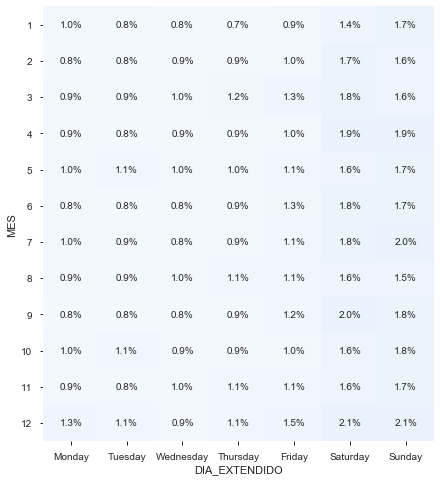

g_columna


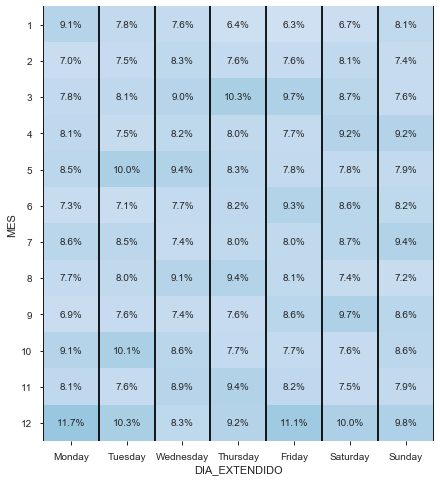

g_fila


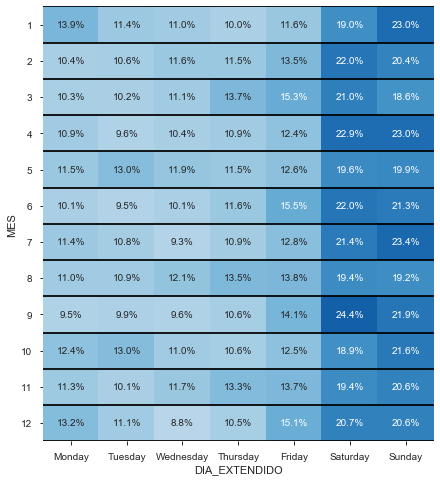

In [62]:
import seaborn as sns
var1='MES'
var2='DIA_EXTENDIDO'
var_aux='STR_NUMERO_INTERNO'

A=data2018.groupby([var1,var2]).agg({'STR_NUMERO_INTERNO':'count'}).reset_index().rename(columns={var_aux:'Frecuencia'})
A['Porcentaje']=A['Frecuencia']/A['Frecuencia'].sum()
join=(A.pivot(var1,var2,'Porcentaje')).fillna(0)
join = join.reindex(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"], axis=1)
gc=join/join.sum(axis=0)
gf=(join.T/join.sum(axis=1)).T
M=[join,gc,gf]
title=["join",'g_columna',"g_fila"]
#x_labels = ['LUN', 'MAR', 'MIE', 'JUE', 'VIE', 'SAB', 'DOM']

for k in range(3):
 print(title[k])
 fig, ax = plt.subplots(1,1,sharex=True, sharey=True)
 fig.set_size_inches(7, 8)
 g=sns.heatmap(M[k],vmin=0, vmax=0.3,annot=True,fmt=".1%",linewidths=0,cmap="Blues",cbar=False)
 g.set_yticklabels(g.get_yticklabels(), rotation = 0)
 bottom, top = ax.get_ylim()
 ax.set_ylim(bottom + 0.5, top - 0.5)
 if k == 1:
   ax.vlines(np.arange(20), *ax.get_ylim())
 if k == 2:
   ax.hlines(np.arange(20), *ax.get_xlim())

 plt.savefig("figuras_nuse/nuse_mes_dia_extendido_condicional_"+title[k],dpi=300,bbox_inches = "tight")
 plt.show()

## Mes y año

### Conjunta

In [ ]:
data2018['ANIO']=data2018["ANIO"].astype(str)
subdata = pd.DataFrame(data2018.groupby(['ANIO','MES']).size()).reset_index().rename(columns={0:"Cantidad"})
subdata['Porcentaje']=subdata['Cantidad']/subdata['Cantidad'].sum()*100

fig = px.scatter(subdata, x="MES", y="Porcentaje", size="Porcentaje", color="ANIO",
                 width=1000, height=600, color_discrete_sequence = px.colors.qualitative.Prism[4:],
                 hover_name="ANIO", size_max=40,labels={"ANIO":"AÑO"})
fig.update_layout(title_text="",legend_orientation='v',xaxis={"type":"category"})
fig.update_xaxes(tickangle=0)
#fig.write_image("figuras_nuse/nuse_mes_año_conjunta.png")
fig.show()

### Condicional

In [ ]:
import seaborn as sns
var1='ANIO'
var2='MES'
var_aux='STR_NUMERO_INTERNO'

A=data2018.groupby([var1,var2]).agg({'STR_NUMERO_INTERNO':'count'}).reset_index().rename(columns={var_aux:'Frecuencia'})
A['Porcentaje']=A['Frecuencia']/A['Frecuencia'].sum()
join=(A.pivot(var1,var2,'Porcentaje')).fillna(0)
gc=join/join.sum(axis=0)
gf=(join.T/join.sum(axis=1)).T
M=[join,gc,gf]
title=["join",'g_columna',"g_fila"]
#x_labels = ['LUN', 'MAR', 'MIE', 'JUE', 'VIE', 'SAB', 'DOM']

for k in range(3):
 print(title[k])
 fig, ax = plt.subplots(1,1,sharex=True, sharey=True)
 fig.set_size_inches(7, 3)
 g=sns.heatmap(M[k],vmin=0, vmax=0.3,annot=True,fmt=".1%",linewidths=0.3,cmap="Blues",cbar=False)
 g.set_yticklabels(g.get_yticklabels(), rotation = 0)
 bottom, top = ax.get_ylim()
 ax.set_ylim(bottom + 0.5, top - 0.5)
 if k == 1:
   ax.vlines(np.arange(20), *ax.get_ylim())
 if k == 2:
   ax.hlines(np.arange(20), *ax.get_xlim())

 plt.savefig("figuras_nuse/nuse_mes_año_condicional_"+title[k],dpi=300,bbox_inches = "tight")
 plt.show()

## Localidades y rango hora

### Conjunta

In [ ]:
subdata = pd.DataFrame(data.groupby(['LOCALIDAD','RANGO_HORA']).size()).reset_index().rename(columns={0:"Cantidad"})
subdata['Porcentaje']=subdata['Cantidad']/subdata['Cantidad'].sum()*100

fig = px.scatter(subdata, x="LOCALIDAD", y="Porcentaje", size="Porcentaje", color="RANGO_HORA",
                 width=1000, height=600, color_discrete_sequence = px.colors.qualitative.Prism[1:],
                 category_orders={"RANGO_HORA": ["0:00 a 3:59","4:00 a 7:59","8:00 a 11:59","12:00 a 15:59","16:00 a 19:59","20:00 a 23:59"]},
                 hover_name="RANGO_HORA", size_max=40,labels={"RANGO_HORA":"Hora"})
fig.update_layout(title_text="",legend_orientation='v')
fig.update_xaxes(tickangle=90)
#fig.write_image("figuras_nuse/nuse_localidad_rango_hora_conjunta.png")
fig.show()

### Condicional

In [ ]:
import seaborn as sns
var1='LOCALIDAD'
var2='RANGO_HORA'
var_aux='STR_NUMERO_INTERNO'

A=data.groupby([var1,var2]).agg({'STR_NUMERO_INTERNO':'count'}).reset_index().rename(columns={var_aux:'Frecuencia'})
A['Porcentaje']=A['Frecuencia']/A['Frecuencia'].sum()
join=(A.pivot(var1,var2,'Porcentaje')).fillna(0)
join = join.reindex(["0:00 a 3:59","4:00 a 7:59","8:00 a 11:59","12:00 a 15:59","16:00 a 19:59","20:00 a 23:59"], axis=1)
join.head()

In [ ]:
gc=join/join.sum(axis=0)
gf=(join.T/join.sum(axis=1)).T
M=[join,gc,gf]
title=["join",'g_columna',"g_fila"]

for k in range(3):
 print(title[k])
 fig, ax = plt.subplots(1,1,sharex=True, sharey=True)
 fig.set_size_inches(7, 8)
 g=sns.heatmap(M[k],vmin=0, vmax=0.3,annot=True,fmt=".1%",linewidths=0,cmap="Blues",cbar=False)
 g.set_yticklabels(g.get_yticklabels(), rotation = 0)
 bottom, top = ax.get_ylim()
 ax.set_ylim(bottom + 0.5, top - 0.5)
 if k == 1:
   ax.vlines(np.arange(20), *ax.get_ylim())
 if k == 2:
   ax.hlines(np.arange(20), *ax.get_xlim())

 plt.savefig("figuras_nuse/nuse_localidad_rango_hora_condicional_"+title[k],dpi=300,bbox_inches = "tight")
 plt.show()

## Localidades y día de la semana

### Conjunta

In [ ]:
subdata = pd.DataFrame(data.groupby(['LOCALIDAD','day_of_week']).size()).reset_index().rename(columns={0:"Cantidad"})
subdata['Porcentaje']=subdata['Cantidad']/subdata['Cantidad'].sum()*100

fig = px.scatter(subdata, x="LOCALIDAD", y="Porcentaje", size="Porcentaje", color="day_of_week",
                 width=1000, height=600, color_discrete_sequence = px.colors.qualitative.Prism[1:],
                 category_orders={"day_of_week": ["Monday", "Tuesday", "Wednesday", "Thursday","Friday","Saturday","Sunday"]},
                 hover_name="day_of_week", size_max=40,labels={"day_of_week":"day"})
fig.update_layout(title_text="",legend_orientation='v')
fig.update_xaxes(tickangle=90)
#fig.write_image("figuras_nuse/nuse_localidad_día_conjunta.png")
fig.show()

### Condicional

In [ ]:
data['DIA_SEMANA'] = data["FECHA"].dt.dayofweek
data2018['DIA_SEMANA'] = data2018["FECHA"].dt.dayofweek

In [ ]:
import seaborn as sns
var1='LOCALIDAD'
var2='DIA_SEMANA'
var_aux='STR_NUMERO_INTERNO'

A=data.groupby([var1,var2]).agg({'STR_NUMERO_INTERNO':'count'}).reset_index().rename(columns={var_aux:'Frecuencia'})
A['Porcentaje']=A['Frecuencia']/A['Frecuencia'].sum()
join=(A.pivot(var1,var2,'Porcentaje')).fillna(0)
gc=join/join.sum(axis=0)
gf=(join.T/join.sum(axis=1)).T
M=[join,gc,gf]
title=["join",'g_columna',"g_fila"]
x_labels = ['LUN', 'MAR', 'MIE', 'JUE', 'VIE', 'SAB', 'DOM']

for k in range(3):
 print(title[k])
 fig, ax = plt.subplots(1,1,sharex=True, sharey=True)
 fig.set_size_inches(7, 8)
 g=sns.heatmap(M[k],vmin=0, vmax=0.3,annot=True,fmt=".1%",linewidths=0.3,cmap="Blues",cbar=False,xticklabels=x_labels)
 g.set_yticklabels(g.get_yticklabels(), rotation = 0)
 bottom, top = ax.get_ylim()
 ax.set_ylim(bottom + 0.5, top - 0.5)
 if k == 1:
   ax.vlines(np.arange(20), *ax.get_ylim())
 if k == 2:
   ax.hlines(np.arange(20), *ax.get_xlim())

 #plt.savefig("figuras_nuse/nuse_localidad_dia_condicional_"+title[k],dpi=300,bbox_inches = "tight")
 plt.show()

## Localidades y día extendido

### Conjunta

In [64]:
subdata = pd.DataFrame(data.groupby(['LOCALIDAD','DIA_EXTENDIDO']).size()).reset_index().rename(columns={0:"Cantidad"})
subdata['Porcentaje']=subdata['Cantidad']/subdata['Cantidad'].sum()*100

fig = px.scatter(subdata, x="LOCALIDAD", y="Porcentaje", size="Porcentaje", color="DIA_EXTENDIDO",
                 width=1000, height=600, color_discrete_sequence = px.colors.qualitative.Prism[1:],
                 category_orders={"DIA_EXTENDIDO": ["Monday", "Tuesday", "Wednesday", "Thursday","Friday","Saturday","Sunday"]},
                 hover_name="DIA_EXTENDIDO", size_max=40,labels={"DIA_EXTENDIDO":"DIA_EXTENDIDO"})
fig.update_layout(title_text="",legend_orientation='v')
fig.update_xaxes(tickangle=90)
fig.write_image("figuras_nuse/nuse_localidad_día_extendido_conjunta.png")
fig.show()

### Condicional

In [ ]:
data['DIA_SEMANA'] = data["FECHA"].dt.dayofweek
data2018['DIA_SEMANA'] = data2018["FECHA"].dt.dayofweek

join


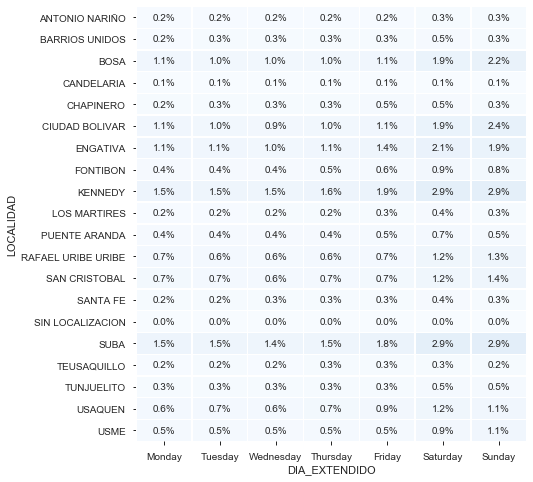

g_columna


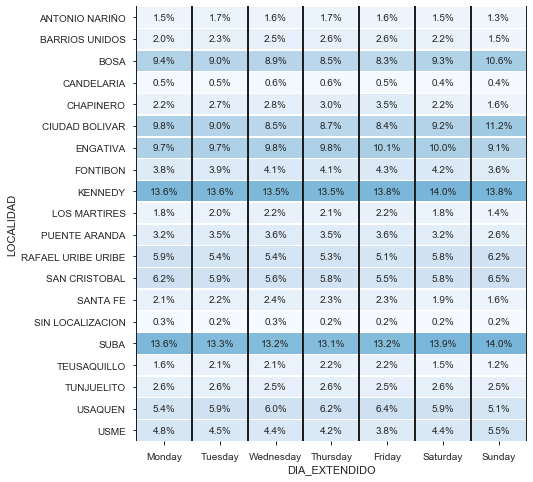

g_fila


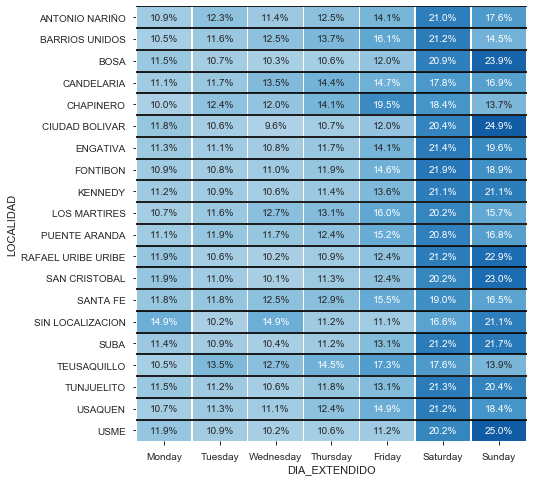

In [67]:
import seaborn as sns
var1='LOCALIDAD'
var2='DIA_EXTENDIDO'
var_aux='STR_NUMERO_INTERNO'

A=data.groupby([var1,var2]).agg({'STR_NUMERO_INTERNO':'count'}).reset_index().rename(columns={var_aux:'Frecuencia'})
A['Porcentaje']=A['Frecuencia']/A['Frecuencia'].sum()
join=(A.pivot(var1,var2,'Porcentaje')).fillna(0)
join = join.reindex(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"], axis=1)
gc=join/join.sum(axis=0)
gf=(join.T/join.sum(axis=1)).T
M=[join,gc,gf]
title=["join",'g_columna',"g_fila"]
#x_labels = ['LUN', 'MAR', 'MIE', 'JUE', 'VIE', 'SAB', 'DOM']

for k in range(3):
 print(title[k])
 fig, ax = plt.subplots(1,1,sharex=True, sharey=True)
 fig.set_size_inches(7, 8)
 g=sns.heatmap(M[k],vmin=0, vmax=0.3,annot=True,fmt=".1%",linewidths=0.3,cmap="Blues",cbar=False)
 g.set_yticklabels(g.get_yticklabels(), rotation = 0)
 bottom, top = ax.get_ylim()
 ax.set_ylim(bottom + 0.5, top - 0.5)
 if k == 1:
   ax.vlines(np.arange(20), *ax.get_ylim())
 if k == 2:
   ax.hlines(np.arange(20), *ax.get_xlim())

 #plt.savefig("figuras_nuse/nuse_localidad_dia_extendido_condicional_"+title[k],dpi=300,bbox_inches = "tight")
 plt.show()

## Localidades y mes

### Conjunta

In [ ]:
subdata = pd.DataFrame(data2018.groupby(['LOCALIDAD','MES']).size()).reset_index().rename(columns={0:"Cantidad"})
subdata['Porcentaje']=subdata['Cantidad']/subdata['Cantidad'].sum()*100

fig = px.scatter(subdata, x="LOCALIDAD", y="Porcentaje", size="Porcentaje", color="MES",
                 width=1000, height=600, color_discrete_sequence = px.colors.qualitative.Prism[1:],
                 category_orders={"MES": ["1","2","3","4","5","6","7","8","9","10","11","12"]},
                 hover_name="MES", size_max=40,labels={"MES":"Mes"})
fig.update_layout(title_text="",legend_orientation='v')
fig.update_xaxes(tickangle=90)
#fig.write_image("figuras_nuse/nuse_localidad_mes_conjunta.png")
fig.show()

### Condicional

In [ ]:
import seaborn as sns
var1='LOCALIDAD'
var2='MES'
var_aux='STR_NUMERO_INTERNO'

A=data2018.groupby([var1,var2]).agg({'STR_NUMERO_INTERNO':'count'}).reset_index().rename(columns={var_aux:'Frecuencia'})
A['Porcentaje']=A['Frecuencia']/A['Frecuencia'].sum()
join=(A.pivot(var1,var2,'Porcentaje')).fillna(0)
gc=join/join.sum(axis=0)
gf=(join.T/join.sum(axis=1)).T
M=[join,gc,gf]
title=["join",'g_columna',"g_fila"]

for k in range(3):
 print(title[k])
 fig, ax = plt.subplots(1,1,sharex=True, sharey=True)
 fig.set_size_inches(7, 8)
 g=sns.heatmap(M[k],vmin=0, vmax=1,annot=True,fmt=".1%",linewidths=0.3,cmap="Blues",cbar=False)
 g.set_yticklabels(g.get_yticklabels(), rotation = 0)
 bottom, top = ax.get_ylim()
 ax.set_ylim(bottom + 0.5, top - 0.5)
 if k == 1:
   ax.vlines(np.arange(20), *ax.get_ylim())
 if k == 2:
   ax.hlines(np.arange(20), *ax.get_xlim())

 plt.savefig("figuras_nuse/nuse_localidad_mes_condicional_"+title[k],dpi=300,bbox_inches = "tight")
 plt.show()

## Probabilidades condicionales - UPZ y día de la semana

In [ ]:
import seaborn as sns
var1='UPZ'
var2='DIA_SEMANA'
var_aux='STR_NUMERO_INTERNO'

A=data.groupby([var1,var2]).agg({'STR_NUMERO_INTERNO':'count'}).reset_index().rename(columns={var_aux:'Frecuencia'})
A['Porcentaje']=A['Frecuencia']/A['Frecuencia'].sum()
join=(A.pivot(var1,var2,'Porcentaje')).fillna(0)
gc=join/join.sum(axis=0)
gf=(join.T/join.sum(axis=1)).T
M=[join,gc,gf]
title=["join",'g_columna',"g_fila"]

for k in range(3):
 print(title[k])
 fig, ax = plt.subplots(1,1,sharex=True, sharey=True)
 fig.set_size_inches(7, 8)
 g=sns.heatmap(M[k],vmin=0, vmax=0.1,annot=False,fmt=".1%",linewidths=0,cmap="Blues",cbar=False)
 g.set_yticklabels(g.get_yticklabels(), rotation = 0)
 bottom, top = ax.get_ylim()
 ax.set_ylim(bottom + 0.5, top - 0.5)
 if k == 1:
   ax.vlines(np.arange(20), *ax.get_ylim())
 if k == 2:
   ax.hlines(np.arange(20), *ax.get_xlim())

 #plt.savefig("figuras_nuse/nuse_localidad_mes_condicional_"+title[k],dpi=300,bbox_inches = "tight")
 plt.show()

## Mapa de calor

In [ ]:
import folium
from folium import plugins
subdata=data.sample(50000)
map_hooray = folium.Map(location=[4.626860,-74.084216],zoom_start = 11)

In [ ]:
position=pd.DataFrame(subdata.groupby(['LONGITUD','LATITUD','day_of_week']).size()).reset_index().rename(columns={0:"Cantidad"})
position.head()

In [ ]:
position.Cantidad.max()

In [ ]:
len(position)

### Mapa de calor reporte de incidentes general

In [ ]:
points = position[['LATITUD','LONGITUD','Cantidad']]
custom_radius=points.Cantidad.max()*10/position.Cantidad.max()
hm = plugins.HeatMap(points.values.tolist(),radius=custom_radius)
hm.add_to(map_hooray)
#map_hooray.save("figuras_nuse/nuse_map.png")
map_hooray

In [ ]:
points.Cantidad.max()

### Mapa de calor por día de la semana

In [ ]:
points=position.query('day_of_week == "Tuesday"')
points = points[['LATITUD','LONGITUD','Cantidad']]
custom_radius=points.Cantidad.max()*10/position.Cantidad.max()
hm = plugins.HeatMap(points.values.tolist(),radius=custom_radius)
hm.add_to(map_hooray)
#map_hooray.save("figuras_nuse/nuse_map.png")
map_hooray

In [ ]:
points.Cantidad.max()

In [ ]:
print(custom_radius)

In [ ]:
points=position.query('day_of_week == "Sunday"')
points.head()


In [ ]:
def map_points(df, lat_col='latitude', lon_col='loLONGITUDngitude', zoom_start=11, \
                plot_points=False, pt_radius=15, \
                draw_heatmap=False, heat_map_weights_col=None, \
                heat_map_weights_normalize=True, heat_map_radius=15):
    """Creates a map given a dataframe of points. Can also produce a heatmap overlay

    Arg:
        df: dataframe containing points to maps
        lat_col: Column containing latitude (string)
        lon_col: Column containing longitude (string)
        zoom_start: Integer representing the initial zoom of the map
        plot_points: Add points to map (boolean)
        pt_radius: Size of each point
        draw_heatmap: Add heatmap to map (boolean)
        heat_map_weights_col: Column containing heatmap weights
        heat_map_weights_normalize: Normalize heatmap weights (boolean)
        heat_map_radius: Size of heatmap point

    Returns:
        folium map object
    """

    ## center map in the middle of points center in
    middle_lat = df[lat_col].median()
    middle_lon = df[lon_col].median()

    curr_map = folium.Map(location=[middle_lat, middle_lon],
                          zoom_start=zoom_start)

    # add points to map
    if plot_points:
        for _, row in df.iterrows():
            folium.CircleMarker([row[lat_col], row[lon_col]],
                                radius=pt_radius,
                                popup=row['name'],
                                fill_color="#3db7e4", # divvy color
                               ).add_to(curr_map)

    # add heatmap
    if draw_heatmap:
        # convert to (n, 2) or (n, 3) matrix format
        if heat_map_weights_col is None:
            cols_to_pull = [lat_col, lon_col]
        else:
            # if we have to normalize
            if heat_map_weights_normalize:
                df[heat_map_weights_col] = \
                    df[heat_map_weights_col] / df[heat_map_weights_col].sum()

            cols_to_pull = [lat_col, lon_col, heat_map_weights_col]

        stations = df[cols_to_pull].as_matrix()
        curr_map.add_children(plugins.HeatMap(stations, radius=heat_map_radius))

    return curr_map